In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

import plotnine as p9

from sklearn.metrics import mean_squared_error


/home/anatol/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
df = pd.read_csv('/home/anatol/Downloads/AiBD_zadania-master/Regression/exercise.csv')

In [3]:
df1 = df[:40]
df1

y    x1     x2
0   15.68  6.87  14.09
1    6.18  4.40   4.35
2   18.10  0.43  18.09
3    9.07  2.73   8.65
4   17.97  3.25  17.68
5   10.04  5.30   8.53
6   20.74  7.08  19.50
7    9.76  9.73   0.72
8    8.23  4.51   6.88
9    6.52  6.40   1.26
10  15.69  5.72  14.62
11  15.51  6.28  14.18
12  20.61  6.14  19.68
13  19.58  8.26  17.75
14   9.72  9.41   2.44
15  16.36  2.88  16.10
16  18.30  5.74  17.37
17  13.26  0.45  13.25
18  12.10  3.74  11.51
19  18.15  5.03  17.44
20  16.80  9.67  13.74
21  16.55  3.62  16.15
22  18.79  2.54  18.62
23  15.68  9.15  12.74
24   4.08  0.69   4.02
25  15.45  7.97  13.24
26  13.44  2.49  13.21
27  20.86  9.81  18.41
28  16.05  7.56  14.16
29   6.00  0.98   5.92
30   3.29  0.65   3.22
31   9.41  9.00   2.74
32  10.76  7.83   7.39
33   5.98  0.26   5.97
34  19.23  3.64  18.89
35  15.67  9.28  12.63
36   7.04  5.66   4.18
37  21.63  9.71  19.32
38  17.84  9.36  15.19
39   7.49  0.88   7.43

In [4]:
results = smf.ols('y~x1+x2', data=df).fit()

In [5]:
wyn = results.params
wyn

Intercept    1.315135
x1           0.514810
x2           0.806920
dtype: float64

In [6]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     652.4
Date:                Thu, 19 Dec 2019   Prob (F-statistic):           1.41e-29
Time:                        03:14:45   Log-Likelihood:                -50.985
No. Observations:                  40   AIC:                             108.0
Df Residuals:                      37   BIC:                             113.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3151      0.388      3.392      0.002       0.530       2.101
x1             0.5148      0.046     11.216      0.000       0.422       0.608
x2             0.8069      0.024     33.148      0.000       0.758       0.856
==============================================================================
Omnibus:                       14.478   Durbin-Watson:                   2.509
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.393
Skew:                           1.341   Prob(JB):                     0.000454
Kurtosis:                       4.428   Cond. No.                         38.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

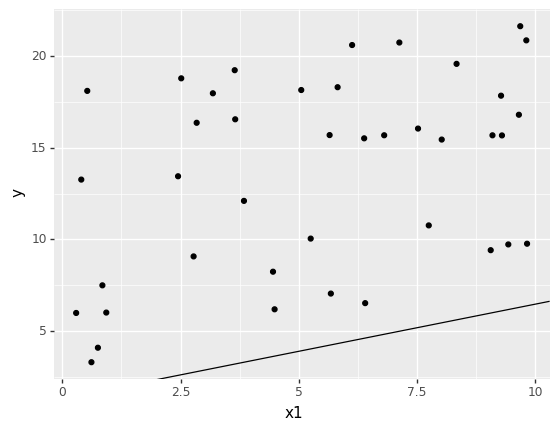

<ggplot: (8745585191488)>

In [7]:
fig1=(p9.ggplot(p9.aes(x='x1',y='y'),data=df1)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['x1'])))
fig1

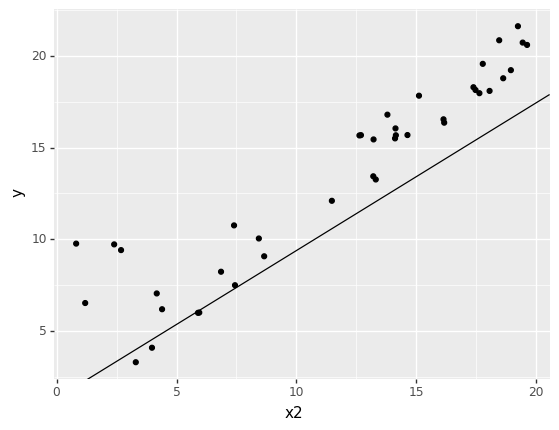

<ggplot: (8745589616125)>

In [8]:
fig1=(p9.ggplot(p9.aes(x='x2',y='y'),data=df1)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['x2'])))
fig1

In [9]:
df_y_data = df1['y']

In [10]:
df_y_predict=results.predict(df1)
print(df_y_predict,df_y_data)

0     16.221378
1      7.090400
2     16.133677
3      9.700421
4     17.254606
5     10.926653
6     20.694923
7      6.905222
8      9.188536
9      5.626640
10    16.057014
11    15.990263
12    20.356247
13    19.890290
14     8.128384
15    15.789193
16    18.286339
17    12.238483
18    12.528169
19    17.977308
20    17.380425
21    16.210499
22    17.647595
23    16.305805
24     4.914170
25    16.101788
26    13.256420
27    21.220813
28    16.633082
29     6.596613
30     4.248042
31     8.159388
32    11.309235
33     6.266295
34    18.431754
35    16.283969
36     7.601885
37    21.903629
38    18.390868
39     7.763580
dtype: float64 0     15.68
1      6.18
2     18.10
3      9.07
4     17.97
5     10.04
6     20.74
7      9.76
8      8.23
9      6.52
10    15.69
11    15.51
12    20.61
13    19.58
14     9.72
15    16.36
16    18.30
17    13.26
18    12.10
19    18.15
20    16.80
21    16.55
22    18.79
23    15.68
24     4.08
25    15.45
26    13.44
27    20.86
28    16.

In [11]:
mean_squared_error(df_y_data,df_y_predict)

0.7493053882464303

/home/anatol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/anatol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


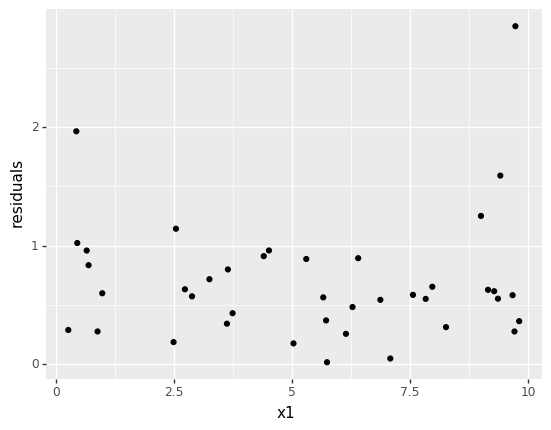

<ggplot: (-9223363291270086256)>

In [12]:
df2=df1
df2['y_pred']=results.predict()
df2['residuals']=abs(df2['y']-df2['y_pred'])
fig1_res=(p9.ggplot(p9.aes(x='x1',y='residuals'),data=df1)
      +p9.geom_point())
fig1_res

/home/anatol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/anatol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


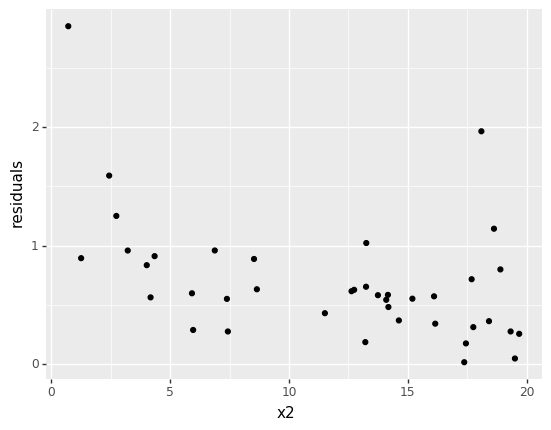

<ggplot: (8745584657942)>

In [13]:
df2=df1
df2['y_pred']=results.predict()
df2['residuals']=abs(df2['y']-df2['y_pred'])
fig1_res=(p9.ggplot(p9.aes(x='x2',y='residuals'),data=df1)
      +p9.geom_point())
fig1_res

In [14]:
results.predict(df[40:60])

40    14.812484
41    19.142865
42     5.916816
43    10.530475
44    19.012485
45    13.398863
46     4.829144
47     9.145767
48     5.892489
49    12.338639
50    18.908561
51    16.064649
52     8.963122
53    14.972786
54     5.859744
55     7.374900
56     4.535267
57    15.133280
58     9.100899
59    16.084900
dtype: float64

## Wnioski

Dla większości punktów wartość absolutna różnicy predykcji od rzecywistej wartości jest mniejsza od 1. 

# Zadanie 2

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df2 = pd.read_csv('/home/anatol/Downloads/AiBD_zadania-master/Regression/beauty.csv')

In [17]:
df2

tenured  profnumber  minority  age  beautyf2upper  beautyflowerdiv  \
0          0           1         1   36              6                5   
1          1           2         0   59              2                4   
2          1           3         0   51              5                5   
3          1           4         0   40              4                2   
4          0           5         0   31              9                7   
..       ...         ...       ...  ...            ...              ...   
458        0          93         0   32              9                6   
459        0          93         0   32              9                6   
460        0          94         1   42              7                3   
461        0          94         1   42              7                3   
462        0          94         1   42              7                3   

     beautyfupperdiv  beautym2upper  beautymlowerdiv  beautymupperdiv  ...  \
0                  7              6                2                4  ...   
1                  4              3                2                3  ...   
2                  2              3                2                3  ...   
3                  5              2                3                3  ...   
4                  9              6                7                6  ...   
..               ...            ...              ...              ...  ...   
458                6              5                7                8  ...   
459                6              5                7                8  ...   
460                8              4                4                6  ...   
461                8              4                4                6  ...   
462                8              4                4                6  ...   

     nonenglish  onecredit  percentevaluating  profevaluation  students  \
0             0          0           55.81395             4.7        43   
1             0          0           85.00000             4.6        20   
2             0          0          100.00000             4.1        55   
3             0          0           86.95652             4.5        46   
4             0          0           87.50000             4.8        48   
..          ...        ...                ...             ...       ...   
458           0          0           42.85714             4.1        21   
459           0          0           60.46511             4.5        86   
460           1          0           77.61194             4.4        67   
461           1          0           81.81818             4.4        66   
462           1          1           80.00000             4.1        35   

     tenuretrack  blkandwhite  btystdvariance  btystdavepos  btystdaveneg  
0              1            0        2.129806      0.201567      0.000000  
1              1            0        1.386081      0.000000     -0.826081  
2              1            0        2.537435      0.000000     -0.660333  
3              1            0        1.760577      0.000000     -0.766312  
4              1            0        1.693100      1.421450      0.000000  
..           ...          ...             ...           ...           ...  
458            1            0        3.107088      1.143040      0.000000  
459            1            0        3.107088      1.143040      0.000000  
460            1            0        3.018447      0.332051      0.000000  
461            1            0        3.018447      0.332051      0.000000  
462            1            0        3.018447      0.332051      0.000000  

[463 rows x 64 columns]

In [18]:
results = smf.ols('courseevaluation ~ btystdave', data=df2).fit()
wyn=results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Thu, 19 Dec 2019   Prob (F-statistic):           4.25e-05
Time:                        03:14:47   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0100      0.026    157.205      0.000       3.960       4.060
btystdave      0.1330      0.032      4.133      0.000       0.070       0.196
==============================================================================
Omnibus:                       15.399   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.405
Skew:                          -0.453   Prob(JB):                     0.000274
Kurtosis:                       2.831   Cond. No.                         1.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

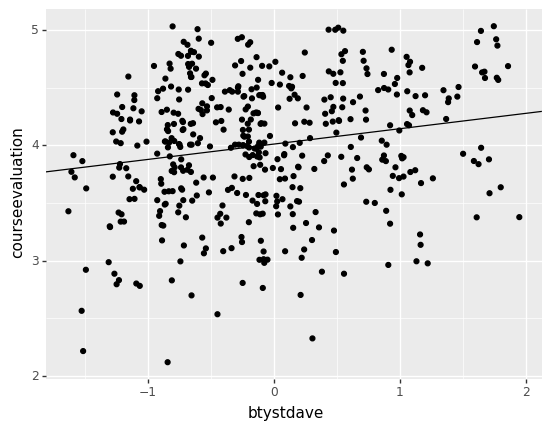

<ggplot: (8745584616680)>

In [19]:
fig1=(p9.ggplot(p9.aes(x='btystdave',y='courseevaluation'),data=df2)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['btystdave'])))
fig1

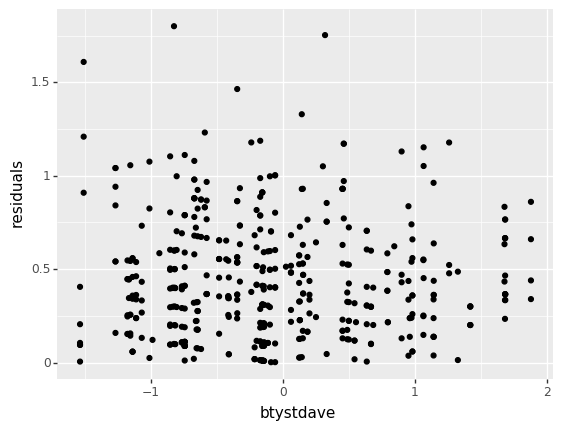

<ggplot: (8745584616589)>

In [20]:
df3=df2
df3['courseevaluation_pred']=results.predict()
df3['residuals']=abs(df3['courseevaluation']-df3['courseevaluation_pred'])
fig1_res=(p9.ggplot(p9.aes(x='btystdave',y='residuals'),data=df3)
      +p9.geom_point())
fig1_res

In [23]:
np.corrcoef(df3['courseevaluation'], df3['courseevaluation_pred'])

array([[1.        , 0.18903908],
       [0.18903908, 1.        ]])

In [ ]:
results = smf.ols('courseevaluation ~ btystdave + female + nonenglish', data=df2).fit()
wyn = results.params
results.summary()

In [ ]:
df3=df2
df3['courseevaluation_pred']=results.predict()
df3['residuals']=abs(df3['courseevaluation']-df3['courseevaluation_pred'])
fig1_res=(p9.ggplot(p9.aes(x='btystdave',y='residuals'),data=df3)
      +p9.geom_point())
fig1_res

In [ ]:
np.corrcoef(df3['courseevaluation'], df3['courseevaluation_pred'])

In [30]:
df2.corr()

tenured  profnumber  minority       age  \
tenured                1.000000    0.008552 -0.112777  0.395046   
profnumber             0.008552    1.000000  0.033525  0.078193   
minority              -0.112777    0.033525  1.000000 -0.103120   
age                    0.395046    0.078193 -0.103120  1.000000   
beautyf2upper         -0.116414    0.081561  0.084787 -0.238958   
...                         ...         ...       ...       ...   
btystdvariance        -0.010820    0.078093  0.067205 -0.000913   
btystdavepos          -0.129705    0.239911 -0.000938 -0.266726   
btystdaveneg          -0.160310   -0.170299  0.062338 -0.250823   
courseevaluation_pred  0.078784    0.051444 -0.186417 -0.043844   
residuals             -0.073291    0.048326  0.069983  0.058836   

                       beautyf2upper  beautyflowerdiv  beautyfupperdiv  \
tenured                    -0.116414        -0.071176        -0.278214   
profnumber                  0.081561        -0.002293        -0.039370   
minority                    0.084787        -0.095778         0.122271   
age                        -0.238958        -0.109086        -0.417802   
beautyf2upper               1.000000         0.641927         0.648152   
...                              ...              ...              ...   
btystdvariance             -0.184272        -0.111290        -0.006316   
btystdavepos                0.740895         0.780916         0.670488   
btystdaveneg                0.667134         0.685889         0.795745   
courseevaluation_pred       0.429653         0.588768         0.440334   
residuals                  -0.056869        -0.090813         0.027152   

                       beautym2upper  beautymlowerdiv  beautymupperdiv  ...  \
tenured                    -0.113480        -0.093832        -0.142310  ...   
profnumber                  0.069226         0.032062         0.123640  ...   
minority                    0.031403        -0.093377         0.120509  ...   
age                        -0.083685        -0.283876        -0.331621  ...   
beautyf2upper               0.513062         0.535983         0.649640  ...   
...                              ...              ...              ...  ...   
btystdvariance              0.179493         0.079137        -0.008126  ...   
btystdavepos                0.662860         0.715617         0.780796  ...   
btystdaveneg                0.682016         0.656614         0.702403  ...   
courseevaluation_pred       0.549581         0.599745         0.540025  ...   
residuals                   0.050054        -0.062406        -0.029448  ...   

                       percentevaluating  profevaluation  students  \
tenured                        -0.107253       -0.071924  0.176054   
profnumber                     -0.056252       -0.032367  0.030963   
minority                        0.142359       -0.075824 -0.096993   
age                            -0.108253       -0.107032 -0.012626   
beautyf2upper                   0.176414        0.164268  0.087050   
...                                  ...             ...       ...   
btystdvariance                 -0.068587       -0.053486  0.022453   
btystdavepos                    0.124670        0.135618  0.088769   
btystdaveneg                    0.127413        0.186629  0.084329   
courseevaluation_pred           0.039497        0.261726  0.188874   
residuals                       0.011819       -0.283187 -0.111075   

                       tenuretrack  blkandwhite  btystdvariance  btystdavepos  \
tenured                   0.583441     0.027564       -0.010820     -0.129705   
profnumber                0.026793     0.334768        0.078093      0.239911   
minority                  0.061896    -0.096671        0.067205     -0.000938   
age                      -0.098865     0.013866       -0.000913     -0.266726   
beautyf2upper             0.079641     0.272844       -0.184272      0.740895   
...                            ...          ...       